In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.style.use('ggplot')

In [2]:
file_path = os.path.join('data', 'covid')
csv_path_1 = os.path.join(file_path, 'edited-WHO-Covid_dataframe.csv')
df = pd.read_csv(csv_path_1)
df

,Unnamed: 0,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,0,0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,1,1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2,2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,3,3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,4,4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
132241,132241,132241,2021-07-09,ZW,Zimbabwe,AFRO,2156,62383,56,2029
132242,132242,132242,2021-07-10,ZW,Zimbabwe,AFRO,2683,65066,55,2084
132243,132243,132243,2021-07-11,ZW,Zimbabwe,AFRO,1787,66853,42,2126
132244,132244,132244,2021-07-12,ZW,Zimbabwe,AFRO,912,67765,59,2185


In [3]:
mask_uk = df['Country_code'] == 'GB'
df_uk = df.loc[mask_uk]
df_uk = df_uk.replace(to_replace = 'The United Kingdom', value = 'United Kingdom')
df_uk = df_uk.drop(['Country_code', 'WHO_region'], axis = 1)
df_uk = df_uk.assign(Case_pct_change = df_uk['New_cases'].pct_change())

df_uk['date'] = pd.to_datetime(df_uk['Date_reported'])
df_uk = df_uk.set_index('date')
df_uk = df_uk.loc[(df_uk['New_cases'] != 0)]
df_uk = df_uk.assign(Mortality_rate = df_uk['Cumulative_deaths'] / df_uk['Cumulative_cases'] * 100)
csv_path_uk = os.path.join(file_path, 'UK-Covid-data.csv')
df_uk.to_csv(csv_path_uk)
df_uk

,Unnamed: 0,index,Date_reported,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
date,,,,,,,,,,
2020-02-01,117767,117767,2020-02-01,United Kingdom,2,2,0,0,inf,0.000000
2020-02-07,117773,117773,2020-02-07,United Kingdom,1,3,0,0,inf,0.000000
2020-02-10,117776,117776,2020-02-10,United Kingdom,4,7,0,0,inf,0.000000
2020-02-11,117777,117777,2020-02-11,United Kingdom,1,8,0,0,-0.750000,0.000000
2020-02-13,117779,117779,2020-02-13,United Kingdom,1,9,0,0,inf,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-07-09,118291,118291,2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215,2.555020
2021-07-10,118292,118292,2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791,2.537812
2021-07-11,118293,118293,2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591,2.522625


In [4]:
df_uk.drop(['Unnamed: 0', 'index', 'Date_reported'], axis = 1, inplace = True)
df_uk

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
date,,,,,,,
2020-02-01,United Kingdom,2,2,0,0,inf,0.000000
2020-02-07,United Kingdom,1,3,0,0,inf,0.000000
2020-02-10,United Kingdom,4,7,0,0,inf,0.000000
2020-02-11,United Kingdom,1,8,0,0,-0.750000,0.000000
2020-02-13,United Kingdom,1,9,0,0,inf,0.000000
...,...,...,...,...,...,...,...
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215,2.555020
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791,2.537812
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591,2.522625


In [5]:
url = 'https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=overview&structure=%7B%22areaType%22:%22areaType%22,%22areaName%22:%22areaName%22,%22areaCode%22:%22areaCode%22,%22date%22:%22date%22,%22newAdmissions%22:%22newAdmissions%22,%22cumAdmissions%22:%22cumAdmissions%22%7D&format=csv'
df_uk_hosp = pd.read_csv(url)
df_uk_hosp

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
0,overview,United Kingdom,K02000001,2021-07-13,740,480507
1,overview,United Kingdom,K02000001,2021-07-12,717,479767
2,overview,United Kingdom,K02000001,2021-07-11,585,479050
3,overview,United Kingdom,K02000001,2021-07-10,547,478465
4,overview,United Kingdom,K02000001,2021-07-09,557,477918
...,...,...,...,...,...,...
473,overview,United Kingdom,K02000001,2020-03-27,2227,12832
474,overview,United Kingdom,K02000001,2020-03-26,1929,10605
475,overview,United Kingdom,K02000001,2020-03-25,2085,8676
476,overview,United Kingdom,K02000001,2020-03-24,1720,6591


In [6]:
df_uk_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   areaType       478 non-null    object
 1   areaName       478 non-null    object
 2   areaCode       478 non-null    object
 3   date           478 non-null    object
 4   newAdmissions  478 non-null    int64 
 5   cumAdmissions  478 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 22.5+ KB


In [7]:
df_uk_hosp.describe()

,newAdmissions,cumAdmissions
count,478.000000,478.000000
mean,997.717573,262188.554393
std,1045.580144,156238.482113
min,72.000000,4871.000000
25%,190.750000,130794.500000
50%,541.000000,203167.000000
75%,1526.500000,453067.000000
max,4579.000000,480507.000000


In [8]:
df_uk_hosp['date'] = pd.to_datetime(df_uk_hosp['date'])
df_uk_hosp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   areaType       478 non-null    object        
 1   areaName       478 non-null    object        
 2   areaCode       478 non-null    object        
 3   date           478 non-null    datetime64[ns]
 4   newAdmissions  478 non-null    int64         
 5   cumAdmissions  478 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 22.5+ KB


In [9]:
df_uk_hosp = df_uk_hosp.set_index(df_uk_hosp.date)
df_uk_hosp

,areaType,areaName,areaCode,date,newAdmissions,cumAdmissions
date,,,,,,
2021-07-13,overview,United Kingdom,K02000001,2021-07-13,740,480507
2021-07-12,overview,United Kingdom,K02000001,2021-07-12,717,479767
2021-07-11,overview,United Kingdom,K02000001,2021-07-11,585,479050
2021-07-10,overview,United Kingdom,K02000001,2021-07-10,547,478465
2021-07-09,overview,United Kingdom,K02000001,2021-07-09,557,477918
...,...,...,...,...,...,...
2020-03-27,overview,United Kingdom,K02000001,2020-03-27,2227,12832
2020-03-26,overview,United Kingdom,K02000001,2020-03-26,1929,10605
2020-03-25,overview,United Kingdom,K02000001,2020-03-25,2085,8676


In [10]:
# Get the number of nulls
df_uk_hosp.isnull().sum()

areaType         0
areaName         0
areaCode         0
date             0
newAdmissions    0
cumAdmissions    0
dtype: int64

In [11]:
# Drop columns that we are not going to use
df_uk_hosp = df_uk_hosp.drop(['date', 'areaType', 'areaName', 'areaCode'], axis = 1)
df_uk_hosp

,newAdmissions,cumAdmissions
date,,
2021-07-13,740,480507
2021-07-12,717,479767
2021-07-11,585,479050
2021-07-10,547,478465
2021-07-09,557,477918
...,...,...
2020-03-27,2227,12832
2020-03-26,1929,10605
2020-03-25,2085,8676


In [12]:
df_uk_hosp.sort_index(ascending = False)

,newAdmissions,cumAdmissions
date,,
2021-07-13,740,480507
2021-07-12,717,479767
2021-07-11,585,479050
2021-07-10,547,478465
2021-07-09,557,477918
...,...,...
2020-03-27,2227,12832
2020-03-26,1929,10605
2020-03-25,2085,8676


In [13]:
df_uk.sort_index(ascending = False)

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate
date,,,,,,,
2021-07-13,United Kingdom,33998,5155247,6,128431,0.084397,2.491268
2021-07-12,United Kingdom,31352,5121249,26,128425,-0.014088,2.507689
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591,2.522625
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791,2.537812
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215,2.555020
...,...,...,...,...,...,...,...
2020-02-13,United Kingdom,1,9,0,0,inf,0.000000
2020-02-11,United Kingdom,1,8,0,0,-0.750000,0.000000
2020-02-10,United Kingdom,4,7,0,0,inf,0.000000


In [14]:
df_uk = pd.merge(
  df_uk,
  df_uk_hosp,
  left_index = True,
  right_index = True
)
df_uk

,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Case_pct_change,Mortality_rate,newAdmissions,cumAdmissions
date,,,,,,,,,
2020-03-23,United Kingdom,1190,8941,36,288,-0.057799,3.221116,1273,4871
2020-03-24,United Kingdom,1375,10316,76,364,0.155462,3.528499,1720,6591
2020-03-25,United Kingdom,2325,12641,148,512,0.690909,4.050312,2085,8676
2020-03-26,United Kingdom,2376,15017,191,703,0.021935,4.681361,1929,10605
2020-03-27,United Kingdom,2690,17707,181,884,0.132155,4.992376,2227,12832
...,...,...,...,...,...,...,...,...,...
2021-07-09,United Kingdom,31977,5022897,35,128336,-0.002215,2.555020,557,477918
2021-07-10,United Kingdom,35200,5058097,29,128365,0.100791,2.537812,547,478465
2021-07-11,United Kingdom,31800,5089897,34,128399,-0.096591,2.522625,585,479050


<AxesSubplot:xlabel='date'>

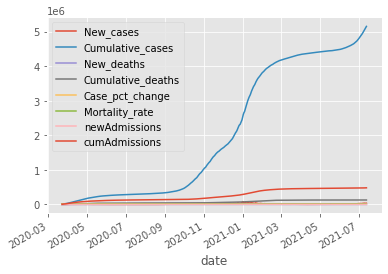

In [15]:
df_uk.plot()

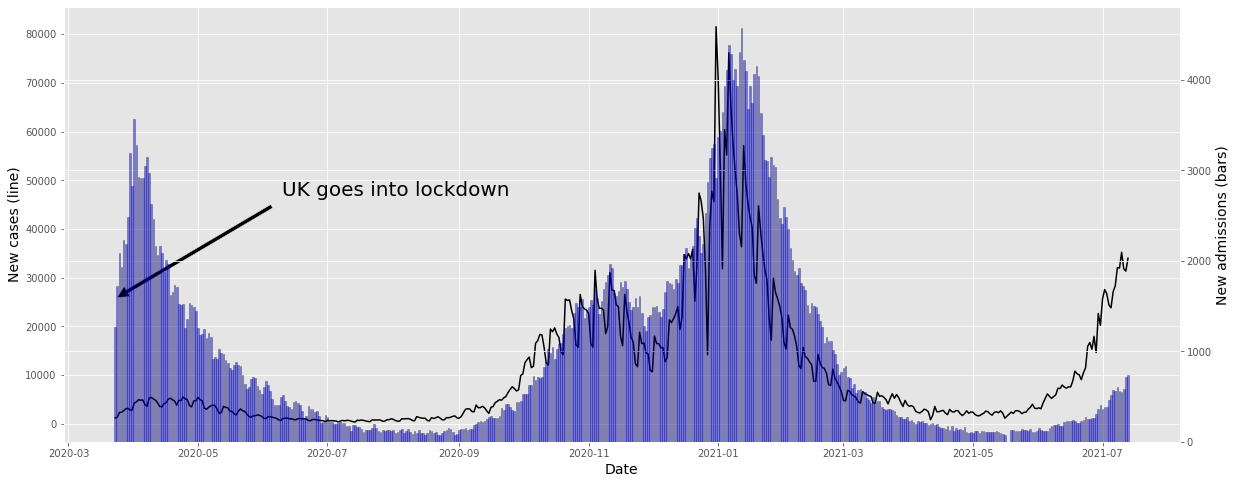

In [16]:
# create figure and axes objects with subplots()
fig, ax = plt.subplots(figsize = (20, 8))

# make a plot
ax.plot(
  df_uk.index,
  df_uk.loc[:, 'New_cases'],
  color = 'black'
)

# set x-axis label
ax.set_xlabel(
  'Date',
  fontsize = 14,
  color = 'black'
)

# set y-axis label
ax.set_ylabel(
  'New cases (line)',
  color = 'black',
  fontsize = 14
)

# Annotate the chart
ax.annotate(
  'UK goes into lockdown',
  xy = (0.04, 0.32),
  xycoords = 'axes fraction',
  xytext = (0.4, 0.6),
  textcoords = 'axes fraction',
  arrowprops = dict(
    facecolor = 'black',
    shrink = 0.05
  ),
  horizontalalignment = 'right',
  verticalalignment = 'top',
  fontsize = 20
)

ax.grid(True)

# twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# make a plot with different y-axis using second axis object
ax2.bar(
  df_uk.index,
  df_uk.loc[:, 'newAdmissions'],
  color = 'blue',
  edgecolor = 'k',
  alpha = 0.5
)

ax2.set_ylabel(
  'New admissions (bars)',
  color = 'black',
  fontsize = 14
)

ax2.grid(True)
plt.show()